## EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def read_data(file_path):
    return pd.read_csv(
        file_path, 
        sep=';',
        header=0,
        compression='gzip', 
        parse_dates=['timestamp', 'lastStart']
    )

In [4]:
%%time
train = read_data('../data/raw/training_data.csv.gz')
test = read_data('../data/raw/test_data.csv.gz')
print(train.shape, test.shape)

(3738763, 17) (3739968, 16)
CPU times: user 2min 10s, sys: 3.36 s, total: 2min 14s
Wall time: 2min 14s


In [5]:
train.head()

,id,timestamp,campaignId,platform,softwareVersion,sourceGameId,country,startCount,viewCount,clickCount,installCount,lastStart,startCount1d,startCount7d,connectionType,deviceType,install
0,5c36658fb58fad351175f0b6,2019-01-09 21:20:15.943000+00:00,59687f0d896a6b0e5ce6ea15,ios,11.4.1,1373094,US,25,24,0,2,2019-01-08 18:49:48.129000+00:00,1,8,cellular,"iPhone8,2",0
1,5c38d5ab1c16172870186b5a,2019-01-11 17:43:07.609000+00:00,59687f0d896a6b0e5ce6ea15,ios,12.1,2739989,US,10,9,2,0,2019-01-09 21:20:22.855000+00:00,1,4,cellular,"iPhone9,1",0
2,5c38815de8f4e50e256e4f9c,2019-01-11 11:43:25.168000+00:00,59687f0d896a6b0e5ce6ea15,ios,12.1.2,1373094,US,27,26,0,0,2019-01-09 10:42:08.446000+00:00,1,2,cellular,"iPhone7,1",0
3,5c409ace532d5806d2c6a5e6,2019-01-17 15:10:06.420000+00:00,59687f0d896a6b0e5ce6ea15,ios,12.1.2,1217749,US,15,14,2,0,2019-01-16 19:58:11.636000+00:00,3,14,wifi,"iPhone7,2",0
4,5c3904b92d798c41e7f3088a,2019-01-11 21:03:53.145000+00:00,59687f0d896a6b0e5ce6ea15,ios,12.0.1,1373094,US,20,18,0,0,2019-01-11 21:03:05.103000+00:00,13,18,cellular,"iPhone8,1",0


In [6]:
CATEGORICAL_FEATURES = [
    'campaignId',
    'platform',
    'softwareVersion',
    'sourceGameId',
    'country',
    'connectionType',
    'deviceType',
]
NUMERICAL_FEATURES = [
    'startCount',
    'viewCount',
    'clickCount',
    'installCount',
    'startCount1d',
    'startCount7d',
]
TARGET_COLUMN = 'install'

### Target

In [7]:
train[TARGET_COLUMN].value_counts()

install
0    3694019
1      44744
Name: count, dtype: int64

In [8]:
train[TARGET_COLUMN].value_counts(normalize=True)

install
0    0.988032
1    0.011968
Name: proportion, dtype: float64

### Features

In [9]:
features = pd.concat([train.drop(columns=['install']), 
                      test])

In [10]:
features.isna().sum()

id                      0
timestamp               0
campaignId              0
platform                0
softwareVersion         0
sourceGameId            0
country               577
startCount              0
viewCount               0
clickCount              0
installCount            0
lastStart          550310
startCount1d            0
startCount7d            0
connectionType          0
deviceType              5
dtype: int64

#### CATEGORICAL

In [11]:
features[CATEGORICAL_FEATURES].nunique()

campaignId          9746
platform               2
softwareVersion      234
sourceGameId       41380
country              220
connectionType         3
deviceType         33978
dtype: int64

In [12]:
print('CAT FEATURES DIFF')
print('[train vs. test / test vs. train]')
print('*'*20)

for cat in CATEGORICAL_FEATURES:
    print(f'{cat} | [{len(set(train[cat]) - set(test[cat]))} / {len(set(test[cat]) - set(train[cat]))}]')

CAT FEATURES DIFF
[train vs. test / test vs. train]
********************
campaignId | [38 / 54]
platform | [0 / 0]
softwareVersion | [36 / 39]
sourceGameId | [6684 / 6532]
country | [0 / 0]
connectionType | [0 / 0]
deviceType | [5682 / 5681]


#### NUMERICAL

In [13]:
print(NUMERICAL_FEATURES)

['startCount', 'viewCount', 'clickCount', 'installCount', 'startCount1d', 'startCount7d']


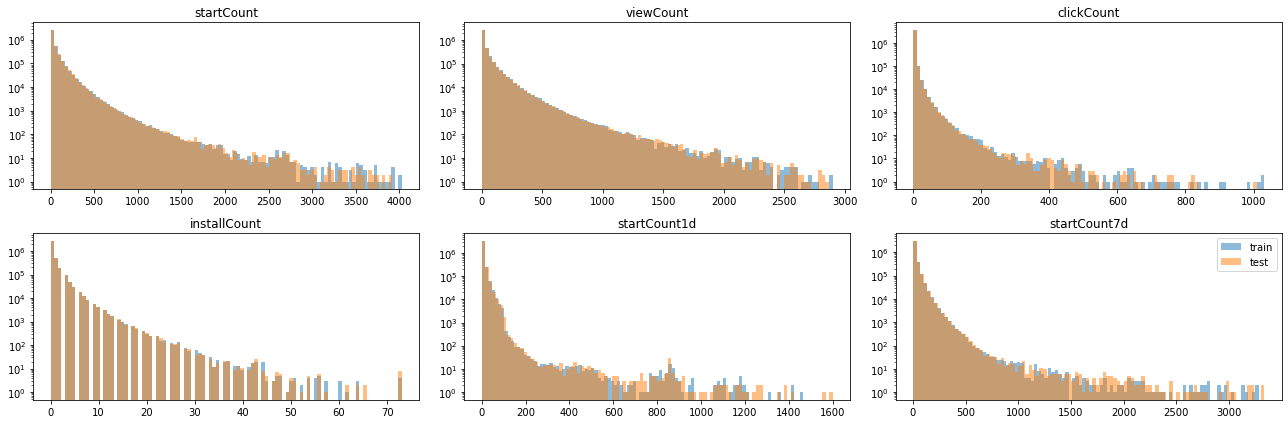

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(18, 6))
params = {'bins': 100, 'log': True, 'alpha': 0.5}

for num, feature in enumerate(NUMERICAL_FEATURES):
    i, j = num // 3, num % 3
    ax[i, j].hist(train[feature], label='train', **params)
    ax[i, j].hist(test[feature], label='test', **params)
    ax[i, j].title.set_text(feature)

plt.tight_layout()
plt.legend()
plt.show()